In [1]:
import numpy as np
import pandas as pd
from tsne import tsne
import matplotlib.pyplot as plt

In [2]:
directory = "./"

train_data = pd.read_csv(directory+'train.csv')
test_data = pd.read_csv(directory+'test.csv')

train_x = train_data.drop(['id', 'label'], axis = 1).values
train_y = train_data['label'].values
test_x = test_data.drop(['id', 'label'], axis=1).values
test_y = test_data['label'].values

In [3]:
train_x = np.where(train_x >= 127, 1, 0)
test_x = np.where(test_x >= 127, 1, 0)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

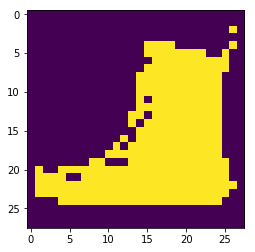

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
learning done!!!!


<Figure size 432x288 with 0 Axes>

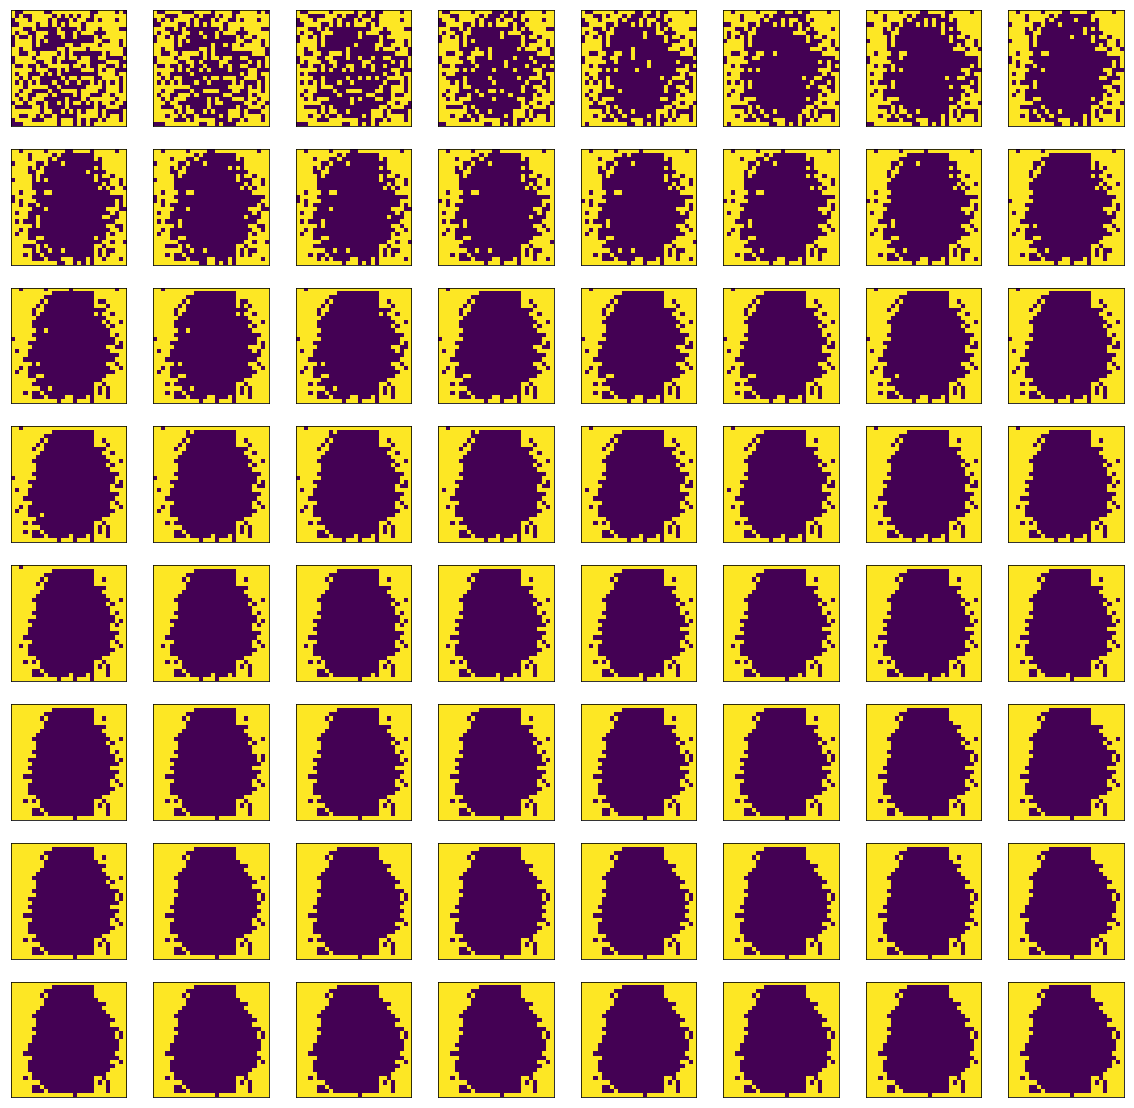

In [13]:
h_n = 200
v_m = 784
W = np.random.randn(h_n, v_m)
b = np.random.randn(v_m)-2
c = np.random.randn(h_n)-2
k = 5
learning_rate = 0.001
norms = []
index = np.random.randint(0, train_x.shape[0])

plt.imshow(train_x[index].reshape(28,28))
plt.show()
plt.clf()

plt.figure(figsize=(20,20))

for i in range(1, 60001):

    x = train_x[i-1]

    v_t = np.copy(x)
    h_t = np.zeros(h_n)

    for _ in range(k):
        pro_samples = np.random.rand(h_n)
        probs = sigmoid(np.matmul(W, v_t) + c)
        h_t = np.where(probs < pro_samples, 1, 0)

        pro_samples = np.random.rand(v_m)
        probs = sigmoid(np.matmul(h_t.T, W) + b)
        v_t = np.where(probs < pro_samples, 1, 0)

    if i % 100 == 0:
        v_t_ = np.copy(train_x[index])
        for _ in range(100):
            pro_samples = np.random.rand(h_n)
            probs = sigmoid(np.matmul(W, v_t_) + c)
            h_t_ = np.where(probs < pro_samples, 1, 0)

            pro_samples = np.random.rand(v_m)
            probs = sigmoid(np.matmul(h_t_.T, W) + b)
            v_t_ = np.where(probs < pro_samples, 1, 0)
#                     plt.imshow(v_t_.reshape(28,28))
        ax = plt.subplot(8,8, i//100)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(v_t_.reshape(28,28))
        print(i/100)

    update_c_by_vd = sigmoid(np.matmul(W, x) + c)
    update_c_by_vt = sigmoid(np.matmul(W, v_t) + c)
    update_W_by_vd = np.outer(update_c_by_vd, x)
    update_W_by_vt = np.outer(update_c_by_vt, v_t)

    W = W + learning_rate * (update_W_by_vd - update_W_by_vt)
    b = b + learning_rate * (x - v_t)
    c = c + learning_rate * (update_c_by_vd - update_c_by_vt)

print("learning done!!!!")
# probs = sigmoid(np.matmul(test_x, W.T) + c)
# pro_samples = np.random.rand(test_x.shape[0], h_n)
# hidden_rep = np.where(probs < pro_samples, 1, 0)

# print(hidden_rep.shape)
# print(hidden_rep[np.random.randint(0, test_x.shape[0])])

# Y= tsne(hidden_rep, 2, h_n, 20.0)
# fig, ax = plt.subplots(figsize=(8,8))
# for g in np.unique(test_y):
#     i = np.where(test_y == g)
#     ax.scatter(Y[i,0], Y[i,1], label=int(g))
# plt.title("t-SNE on "+str(h_n)+"-dimensional data")
# plt.legend()
# plt.savefig(directory+"clusters_"+str(h_n)+"_"+str(learning_rate)+"_"+str(k)+".png")
# plt.show()
# plt.clf()

plt.savefig("All_plots.png")